In [1]:
import random
import src
import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [2]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [3]:
preprocess = src.utils.dataset.Preprocessing(
    dir='./data/',
    img_size=768,
    augmentation=True
)

In [4]:
clear_images, clear_masks = preprocess.load_folder()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


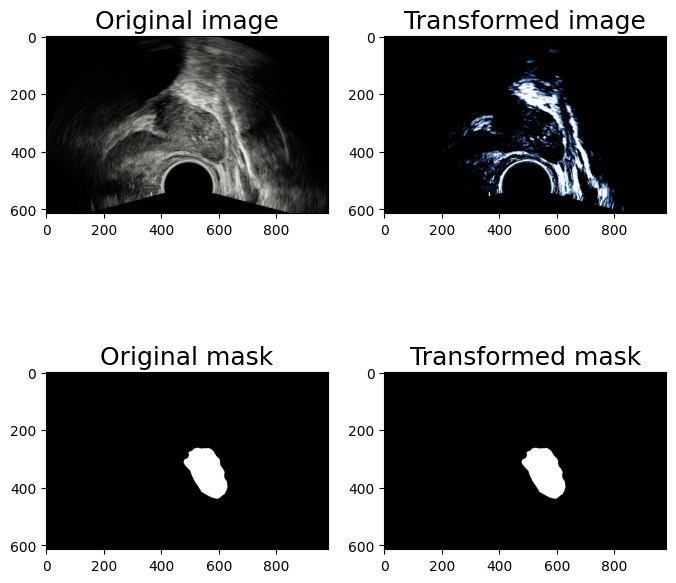

In [11]:
# aug = A.Compose(
#     A.OneOf([
#             A.CropNonEmptyMaskIfExists(
#                 height=256, 
#                 width=256, 
#                 ignore_values=None, 
#                 ignore_channels=None, 
#                 always_apply=False,
#                 p=1.0
#             ),
#             A.PadIfNeeded(
#                 min_height=128,
#                 min_width=128,
#                 p=0.5
#             )
#         ], p=1),
#         # A.OneOf([
#         #     A.ElasticTransform(
#         #         alpha=120, 
#         #         sigma=120 * 0.05, 
#         #         alpha_affine=120 * 0.03,
#         #         p=0.5
#         #     ),
#         #     A.GridDistortion(p=0.5),
#         #     A.OpticalDistortion(
#         #         distort_limit=10,
#         #         shift_limit=0.2, 
#         #         p=1
#         #     )                  
#         # ], p=0.8)
        
# )
aug = A.Compose([
    # A.OneOf([
    #     A.CropNonEmptyMaskIfExists(
    #         height=256, 
    #         width=256, 
    #         ignore_values=None, 
    #         ignore_channels=None, 
    #         always_apply=False,
    #         p=1.0
    #     ),
    #     A.PadIfNeeded(min_height=256, min_width=256, p=0.5)
    # ], p=1),    
    # A.VerticalFlip(p=0.5),              
    # A.RandomRotate90(p=0.5),
    # A.OneOf([
    #     A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),
    #     A.GridDistortion(p=0.5),
    #     A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)                  
    #     ], p=0.8),
    # A.CLAHE(p=0.8),
    # A.RandomBrightnessContrast(p=0.8),    
    # A.RandomGamma(p=0.8)
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0)
    ])

augmented = aug(image=clear_images[0], mask=clear_masks[0])

image_padded = augmented['image']
mask_padded = augmented['mask']
visualize(image_padded, mask_padded, original_image=clear_images[0], original_mask=clear_masks[0])